## Practical 7 : PCA on MNIST dataset

## dhruv patel bda sem 7 17162121014



In [1]:
## PCA using MNIST Dataset

import re
import math
from sklearn.decomposition import PCA
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
df = pd.read_csv("mnist_train.csv")
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
col_names = df.columns.tolist()
# col_names
len(col_names)

785

In [4]:
len(col_names[1:])

784

In [5]:
#Indexing by labels  names
indexes = df.iloc[1:,0]
df = df.iloc[1:,1:len(df)]
df.set_index(indexes)
df

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_zscore = df.iloc[:]
for col in df_zscore.columns:
    df_zscore[col] = df_zscore[col].astype(int)
    df_zscore[col] = df_zscore[col] - df_zscore[col].mean()

In [7]:
df_zscore.head(10)

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.200437,-0.088868,-0.045634,-0.019284,-0.015117,-0.002,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.200437,-0.088868,-0.045634,-0.019284,-0.015117,-0.002,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.200437,-0.088868,-0.045634,-0.019284,-0.015117,-0.002,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.200437,-0.088868,-0.045634,-0.019284,-0.015117,-0.002,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.200437,-0.088868,-0.045634,-0.019284,-0.015117,-0.002,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.200437,-0.088868,-0.045634,-0.019284,-0.015117,-0.002,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.200437,-0.088868,-0.045634,-0.019284,-0.015117,-0.002,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.200437,-0.088868,-0.045634,-0.019284,-0.015117,-0.002,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.200437,-0.088868,-0.045634,-0.019284,-0.015117,-0.002,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.200437,-0.088868,-0.045634,-0.019284,-0.015117,-0.002,0.0,0.0,0.0,0.0


In [8]:
#Convert into numpy array first
X_zscore = np.array(df_zscore.values[:,:], dtype='float64')

Component 1 correlates most with  20x19
Component 2 correlates most with  17x17
Component 3 correlates most with  20x14


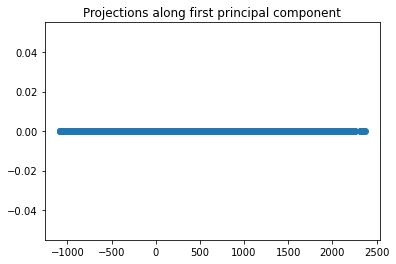

Variance along first principal component:  332724.4115046809


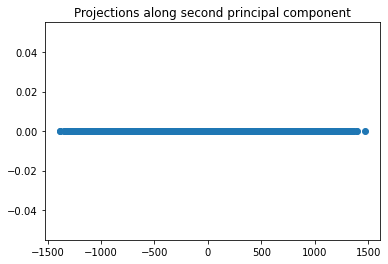

Variance along second principal component:  243282.30996937043


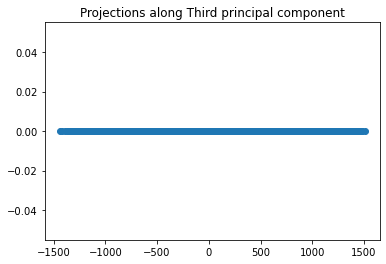

Variance along second principal component:  211507.35531880741


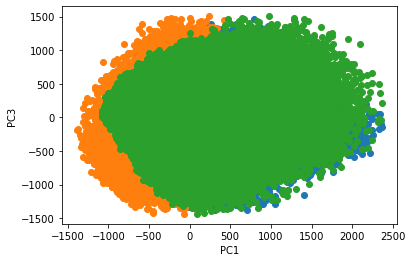

In [9]:
def pcaCompute(X,name):
    
    pca = PCA(n_components=3)
    pca.fit(X)
    projected = pca.components_.T

    a_1 = projected[:,0].T
    a_2 = projected[:,1].T
    a_3 = projected[:,2].T
    
    #print(a_1)
    #print(a_2)
    #print(np.argmax(a_1,axis=-1))
    
    feature_names = list(df_zscore.columns)
    
    print(f'Component 1 correlates most with ',feature_names[np.argmax(a_1,axis=-1)])
    print(f'Component 2 correlates most with ',feature_names[np.argmax(a_2,axis=-1)])
    print(f'Component 3 correlates most with ',feature_names[np.argmax(a_3,axis=-1)])
    
    
    scores_a_1 = np.matmul(X,a_1)
    scores_a_2 = np.matmul(X,a_2)
    scores_a_3 = np.matmul(X,a_3)

    plt.scatter(scores_a_1, np.zeros_like(scores_a_1))
    plt.title('Projections along first principal component')
    plt.show()
    
    print('Variance along first principal component: ', scores_a_1.var())

    plt.scatter(scores_a_2, np.zeros_like(scores_a_2))
    plt.title('Projections along second principal component')
    plt.show()
    
    print('Variance along second principal component: ', scores_a_2.var())
    
    plt.scatter(scores_a_3, np.zeros_like(scores_a_3))
    plt.title('Projections along Third principal component')
    plt.show()
    
    print('Variance along second principal component: ', scores_a_3.var())

    plt.scatter(scores_a_1,scores_a_2)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    
    plt.scatter(scores_a_2,scores_a_3)
    plt.xlabel('PC2')
    plt.ylabel('PC3')
    
    
    plt.scatter(scores_a_1,scores_a_3)
    plt.xlabel('PC1')
    plt.ylabel('PC3')
    
    
    plt.show()
    
    #PCA also helps in finding outliers 
    #We can see in the graph PC1 and PC2 the one of extreme right is an outlier
    #find which city is belongs too
    
    for idx,score in enumerate(scores_a_1):
        if(score > 40000):
            print('Found Outlier city for zscore is ',indexes[idx+1])
            break
            
pcaCompute(X_zscore,'zscore')


In [10]:
## thus we after PCA on MNIST dataset got the top 3 Principal component across all the 785 dimensions